In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('PS4_GamesSales.csv',encoding='latin-1')

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
df.shape

(1034, 9)

In [4]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

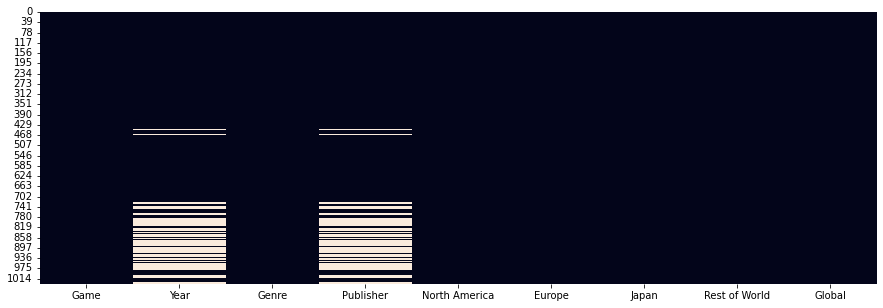

In [5]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False);

In [6]:
# Por ser uma análise de registros individuais, serão removidos os nulos
df.dropna(inplace=True)
df.shape

(825, 9)

In [7]:
df.head(3)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94


> ##### Vendas Globais de games de 2013 até 2018

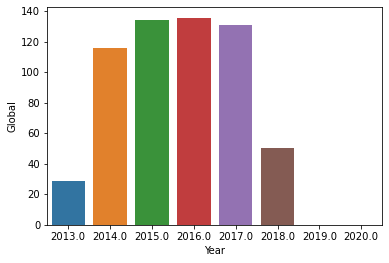

In [8]:
#Plotando
sns.barplot(data= df.groupby(by='Year').sum() ,x= df.groupby(by='Year').sum().index , y= 'Global');

##### Removendo anos com informações erradas

In [9]:
# Removendo 2019 e 2020 q não têm valores
df = df.loc[(df['Year']!= 2019) & (df['Year']!= 2020) ]
df.loc[(df['Year']== 2019) & (df['Year']== 2020) ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global


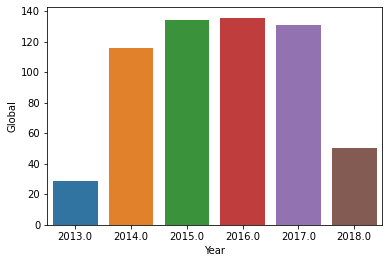

In [10]:
# Agrupando dados pela idade
analise_anual = df.groupby(by='Year').sum()

# Plotando dados ajustados
sns.barplot(data=analise_anual ,x=analise_anual.index, y= 'Global');

In [11]:
analise_anual.head(5)

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90


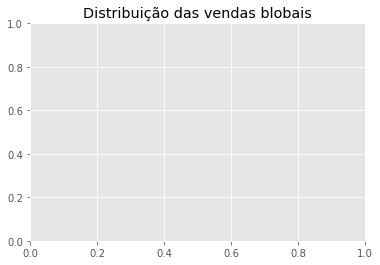

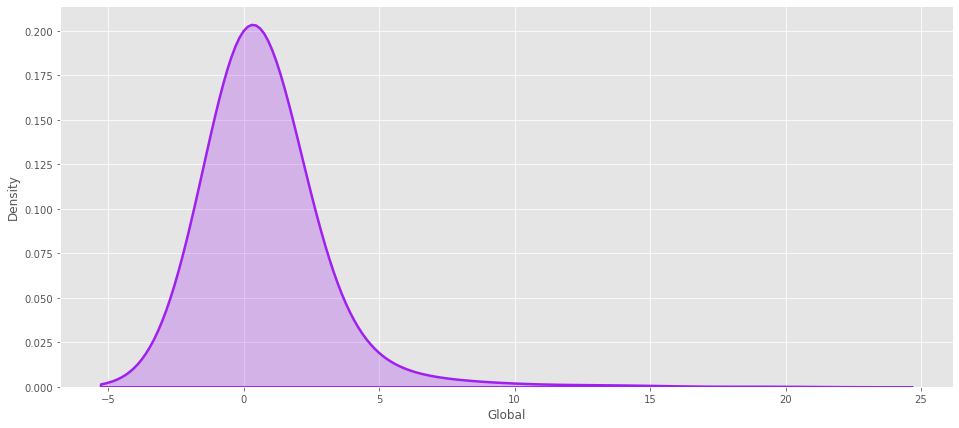

In [48]:
plt.title("Distribuição das vendas blobais")
plt.style.use('ggplot')
sns.kdeplot(df['Global'], shade=True,bw=1 , color = '#A020F0', linewidth=2.5,figsize=(16,7));

In [13]:
# Porcentagem da venda de games por pais/ continente

america = [america/total * 100 for america, total in zip(analise_anual['North America'], analise_anual['Global'])]
europa = [europa/total * 100 for europa, total in zip(analise_anual['Europe'], analise_anual['Global'])]
japao = [japao/total * 100 for japao, total in zip(analise_anual['Japan'], analise_anual['Global'])]
mundo = [mundo/total * 100 for mundo, total in zip(analise_anual['Rest of World'], analise_anual['Global'])]
america, japao, europa, mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

##### Análise da distruibuição por continente

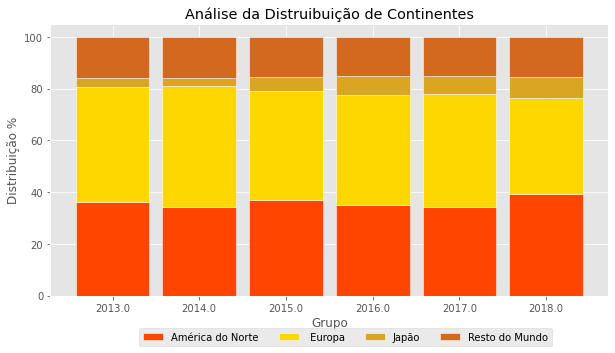

In [14]:
# Tamanho
plt.figure(figsize=(10,5))

# Título
plt.title("Análise da Distruibuição de Continentes")

# Criando Rótulos do Gráfico
largura_barra =  0.85
rotulos = analise_anual.index
grupos = [0,1,2,3,4,5]

# Criando Gráfico States
plt.bar(grupos, 
        america, 
        width=largura_barra, 
        color='#FF4500', 
        edgecolor='white')

# Grafico Europa
plt.bar(grupos, 
        europa,
        bottom=america, 
        width=largura_barra, 
        color='#FFD700', 
        edgecolor='white')

# Criando Gráfico combinado - Euro
plt.bar(grupos, 
        japao,
        bottom=[A+B for A, B in zip(america, europa)],
        width=largura_barra, 
        color='#DAA520', 
        edgecolor='white')

# Criando Gráfico combinado - Japao
plt.bar(grupos, 
        mundo,
        bottom=[A+B+C for A, B, C in zip(america, europa, japao)],
        width=largura_barra, 
        color='#D2691E', 
        edgecolor='white')

# Labels
plt.xticks(grupos, rotulos);
plt.xlabel('Grupo')
plt.ylabel('Distribuição %');

# LEgenda
plt.legend(['América do Norte', ' Europa', 'Japão', 'Resto do Mundo' ], 
           loc='upper left', 
           bbox_to_anchor=(0.15,-0.1),
           ncol = 4);

#### Empresas que publicaram games

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# criando uma nova coluna com um código para cada produtora
df['N° Produtor'] = label_encoder.fit_transform(df['Publisher']);
df['N° Genero'] = label_encoder.fit_transform(df['Genre']);
df['N° Jogo'] = label_encoder.fit_transform(df['Game']);


df.head(3)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,N° Produtor,N° Genero,N° Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,107,1,521


In [79]:
# Paleta de cores

paleta_de_cores = sns.color_palette('magma', 20)
paleta_de_cores

[(0.024792, 0.020715, 0.100676),
 (0.074257, 0.052017, 0.20266),
 (0.135053, 0.068391, 0.315),
 (0.211718, 0.061992, 0.418647),
 (0.291366, 0.064553, 0.475462),
 (0.372116, 0.092816, 0.499053),
 (0.445163, 0.122724, 0.506901),
 (0.519045, 0.150383, 0.507443),
 (0.594508, 0.175701, 0.501241),
 (0.671349, 0.200133, 0.487358),
 (0.754737, 0.228772, 0.462509),
 (0.828886, 0.262229, 0.430644),
 (0.8947, 0.309773, 0.393995),
 (0.944006, 0.377643, 0.365136),
 (0.973381, 0.46152, 0.361965),
 (0.989363, 0.557873, 0.391671),
 (0.99581, 0.646344, 0.441361),
 (0.997341, 0.733545, 0.505167),
 (0.995424, 0.819875, 0.57914),
 (0.991332, 0.905763, 0.661309)]

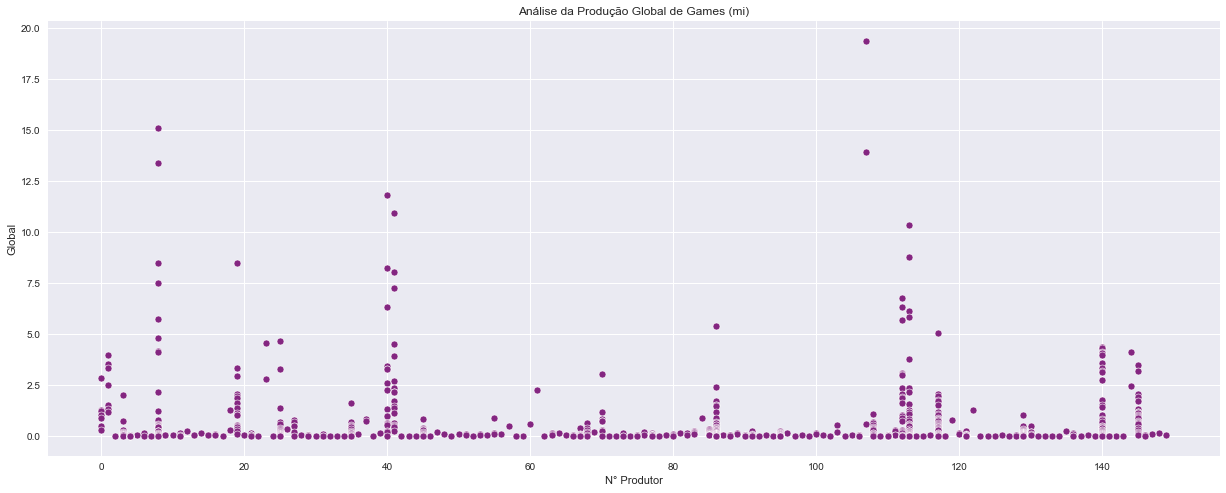

In [80]:
plt.figure(figsize=(21,8))
plt.title("Análise da Produção Global de Games (mi)")
sns.scatterplot(data=df, x='N° Produtor', y= 'Global', color = paleta_de_cores[7]);

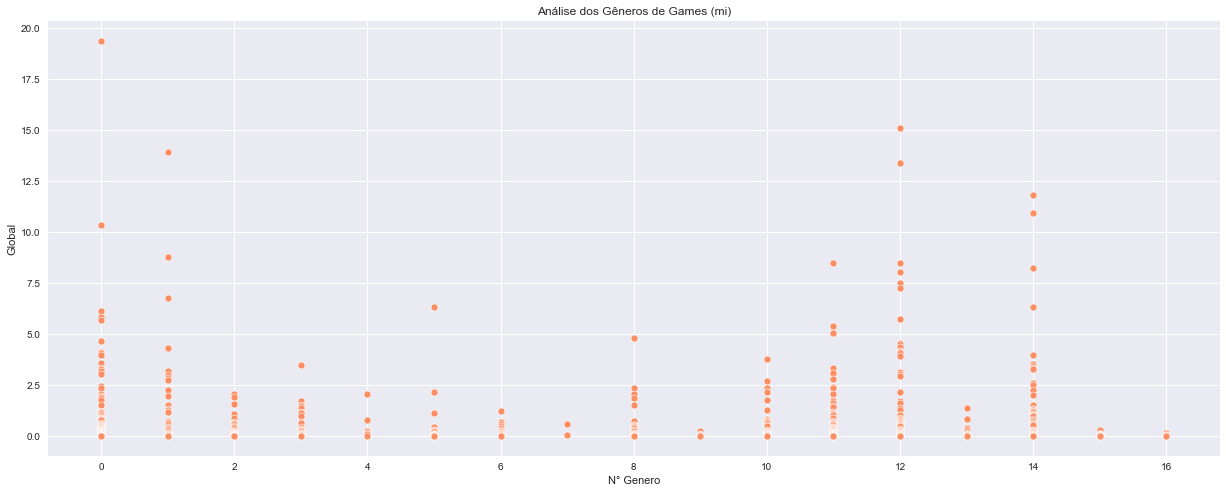

In [81]:
plt.figure(figsize=(21,8))
plt.title("Análise dos Gêneros de Games (mi)")
sns.scatterplot(data=df, x='N° Genero', y= 'Global', color = paleta_de_cores[15]);

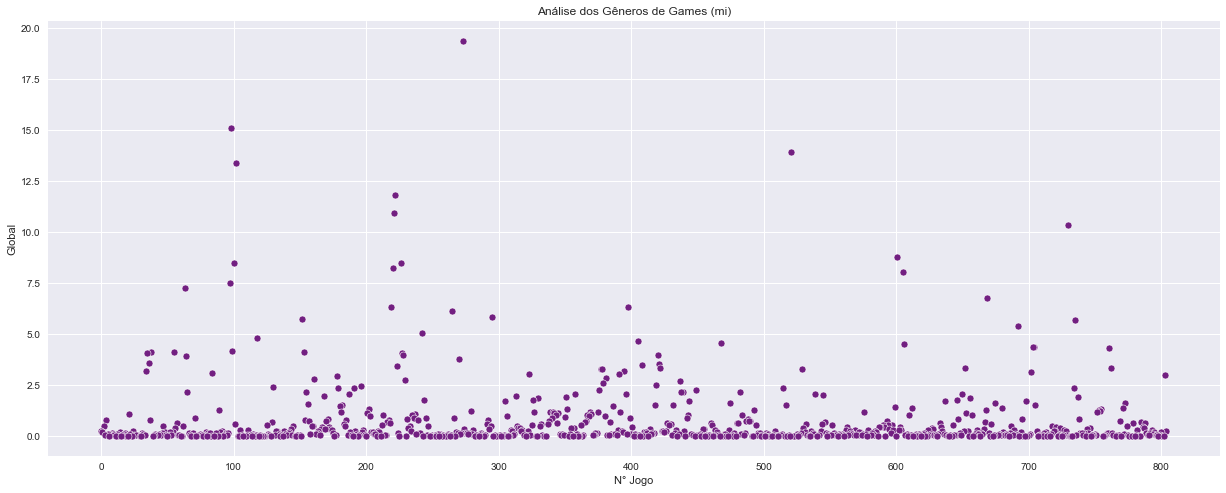

In [82]:
plt.figure(figsize=(21,8))
plt.title("Análise dos Gêneros de Games (mi)")
sns.scatterplot(data=df, x='N° Jogo', y= 'Global', color = paleta_de_cores[6]);

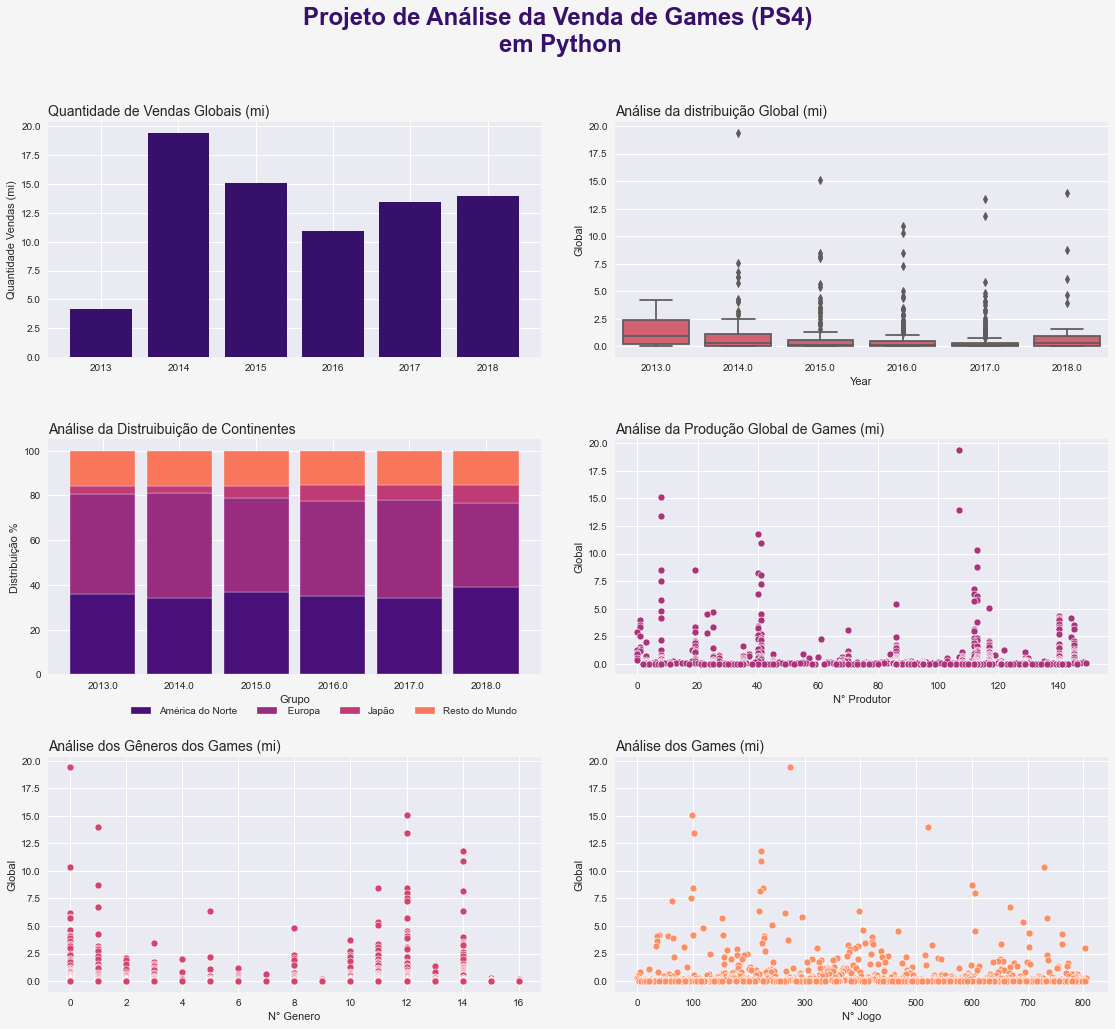

In [94]:
# Criando o Report 

# Tamanho da imagem
fig, ax = plt.subplots(figsize=(19,16))

# Cores de fundo
backgorund = '#f5f5f5'
ax.set_facecolor(backgorund)
fig.set_facecolor(backgorund)

# Estilo dos gráficos
plt.style.use('seaborn')

# Subtítulo da figura
plt.suptitle("Projeto de Análise da Venda de Games (PS4) \nem Python", fontsize = 24, color=paleta_de_cores[3], fontweight=700)

# Parâmetros para a configuração do report
linhas = 3
colunas = 2 


# Criando os gráficos

# Primeiro
plt.subplot(linhas, colunas, 1)
plt.bar(df['Year'],  df['Global'], color = paleta_de_cores[3])
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
plt.ylabel('Quantidade Vendas (mi)')


# Segundo
plt.subplot(linhas, colunas, 2)
sns.boxplot(data=df, x= 'Year', y= 'Global', color=paleta_de_cores[12])
plt.title('Análise da distribuição Global (mi)', loc='left', fontsize=14 )


# Terceiro
plt.subplot(linhas, colunas, 3)
plt.title("Análise da Distruibuição de Continentes", loc='left', fontsize=14 )

# Criando Rótulos do Gráfico
largura_barra =  0.85
rotulos = analise_anual.index
grupos = [0,1,2,3,4,5]

# Criando Gráfico States
plt.bar(grupos, 
        america, 
        width=largura_barra, 
        color=paleta_de_cores[4], 
        edgecolor='white')

# Grafico Europa
plt.bar(grupos, 
        europa,
        bottom=america, 
        width=largura_barra, 
        color=paleta_de_cores[8], 
        edgecolor='white')

# Criando Gráfico combinado - Euro
plt.bar(grupos, 
        japao,
        bottom=[A+B for A, B in zip(america, europa)],
        width=largura_barra, 
        color=paleta_de_cores[10], 
        edgecolor='white')

# Criando Gráfico combinado - Japao
plt.bar(grupos, 
        mundo,
        bottom=[A+B+C for A, B, C in zip(america, europa, japao)],
        width=largura_barra, 
        color=paleta_de_cores[14], 
        edgecolor='white')

# Labels
plt.xticks(grupos, rotulos);
plt.xlabel('Grupo')
plt.ylabel('Distribuição %');

# LEgenda
plt.legend(['América do Norte', ' Europa', 'Japão', 'Resto do Mundo' ], 
           loc='upper left', 
           bbox_to_anchor=(0.15,-0.1),
           ncol = 4);



# Quarto 
plt.subplot(linhas, colunas, 4)
plt.title("Análise da Produção Global de Games (mi)", loc='left', fontsize=14 )
sns.scatterplot(data=df, x='N° Produtor', y= 'Global', color = paleta_de_cores[9]);

# Quinto
plt.subplot(linhas, colunas, 5)
plt.title("Análise dos Gêneros dos Games (mi)", loc='left', fontsize=14 )
sns.scatterplot(data=df, x='N° Genero', y= 'Global', color = paleta_de_cores[11]);

# Sexto
plt.subplot(linhas, colunas, 6)
plt.title("Análise dos Games (mi)", loc='left', fontsize=14 )
sns.scatterplot(data=df, x='N° Jogo', y= 'Global', color = paleta_de_cores[15]);

# Ajsutando o Espaço
plt.subplots_adjust( hspace=0.35, wspace=0.15 )
